# <span style="color:green;">Cancer Exploratory Data Analysis and Visualisation</span>

<span style="color:black;">In this project, we will analyze cancer data by performing data wrangling, visualisation and EDA.</span>

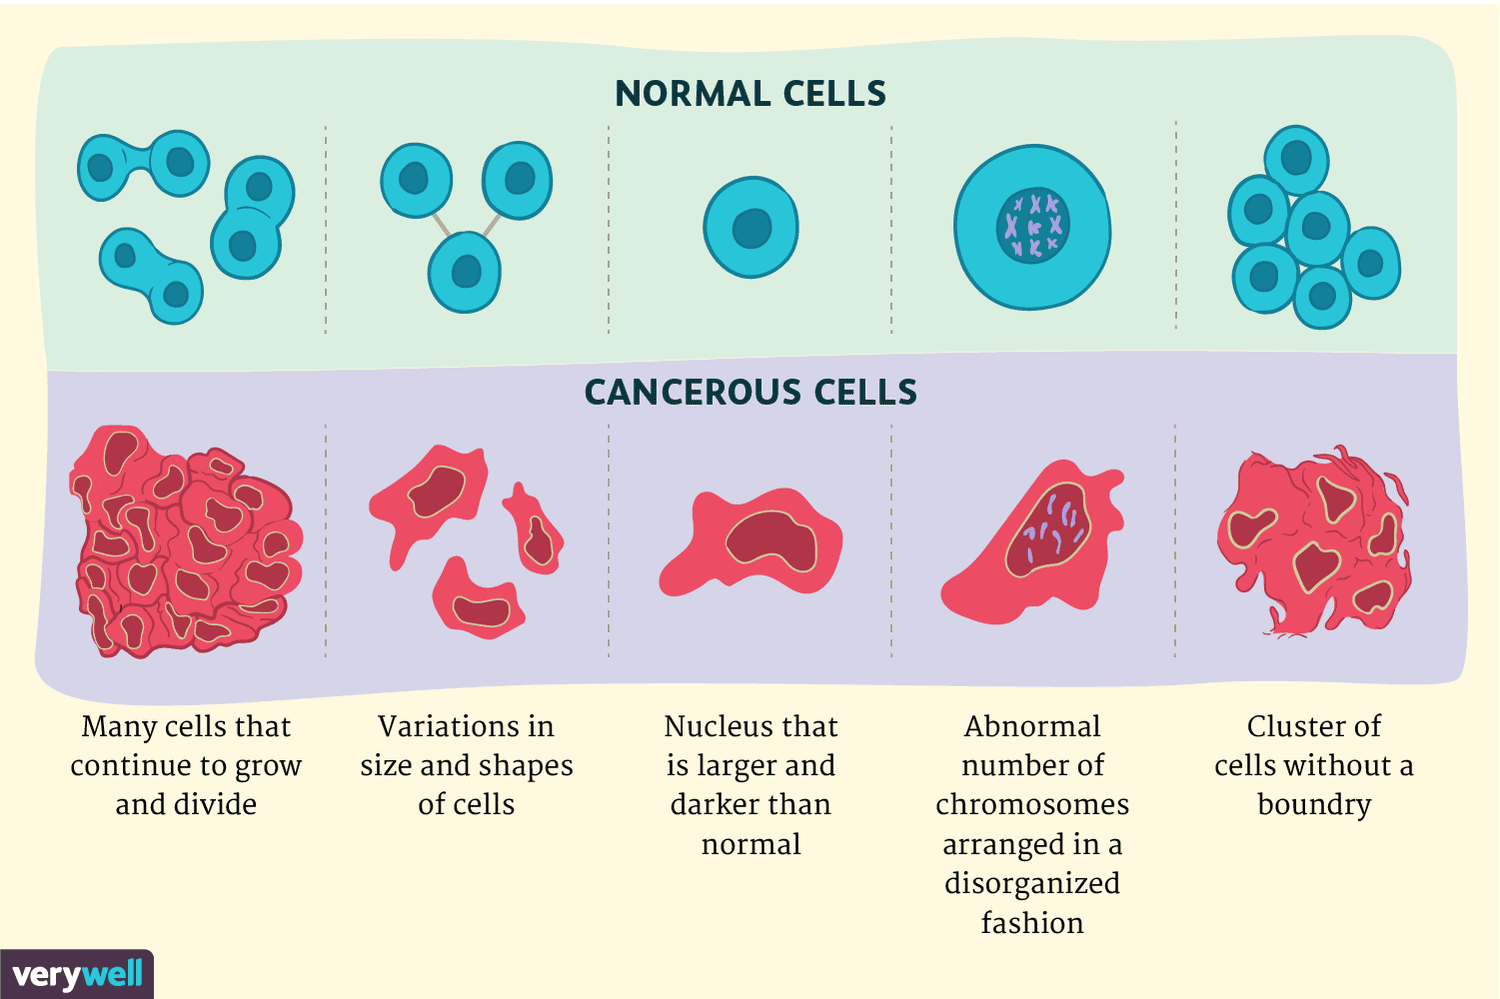

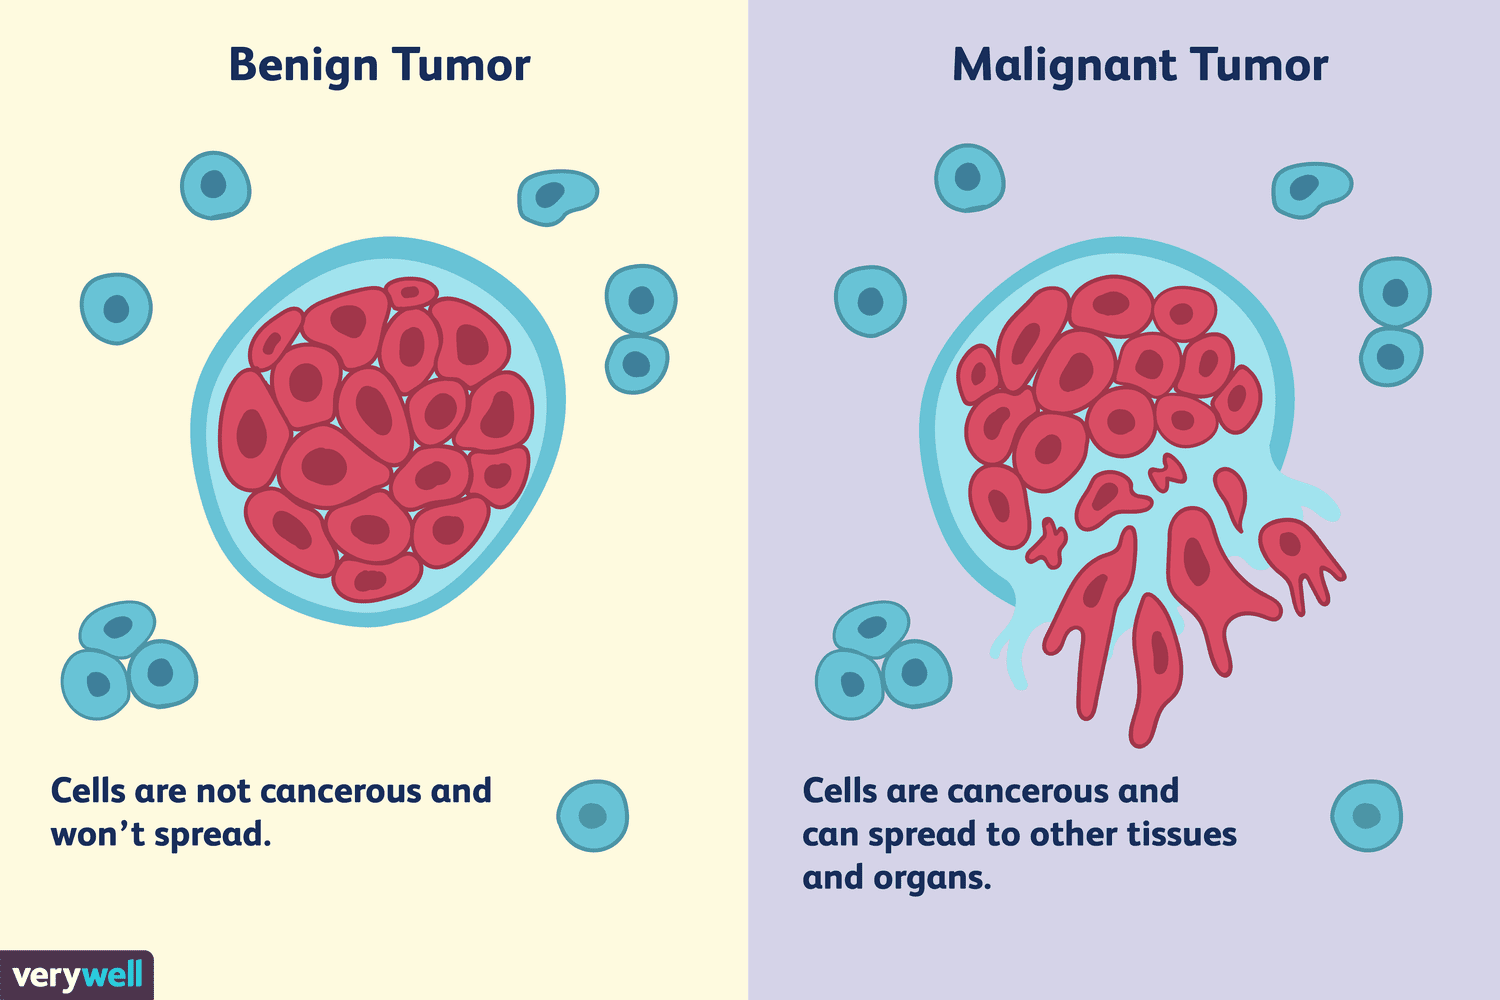

## <span style="color:green;">About Data Set</span>

Dataset Information:
Ten features are computed for each cell nucleus:

- radius (mean of distances from center to points on the perimeter)
- texture (standard deviation of gray-scale values)
- perimeter
- area
- smoothness (local variation in radius lengths)
- compactness (perimeter^2 / area - 1.0)
- concavity (severity of concave portions of the contour)
- concave points (number of concave portions of the contour)
- symmetry
- fractal dimension (coastline approximation - 1)

For each characteristic three measures are given:

- Mean
- Standard error
- Largest/ Worst

## <span style="color:green;">Import dataset and perform basic statistical analysis.</span>

In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [67]:
df0= pd.read_csv('cancer.csv')
df=df0.copy()

In [68]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [69]:
df.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,1


In [70]:
df.shape

(569, 31)

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5



**Let's print out countplot to know how many samples belong to class 0 and 1**

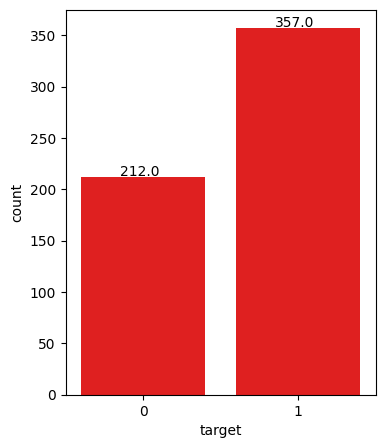

In [72]:

fig, ax = plt.subplots(figsize = (4, 5))

ax_tip = sns.countplot(data = df, x = "target", color='red')

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.25, p.get_height()+1.2))

**The distribution plots** 

**Plot scatter plot between mean area and mean smoothness**

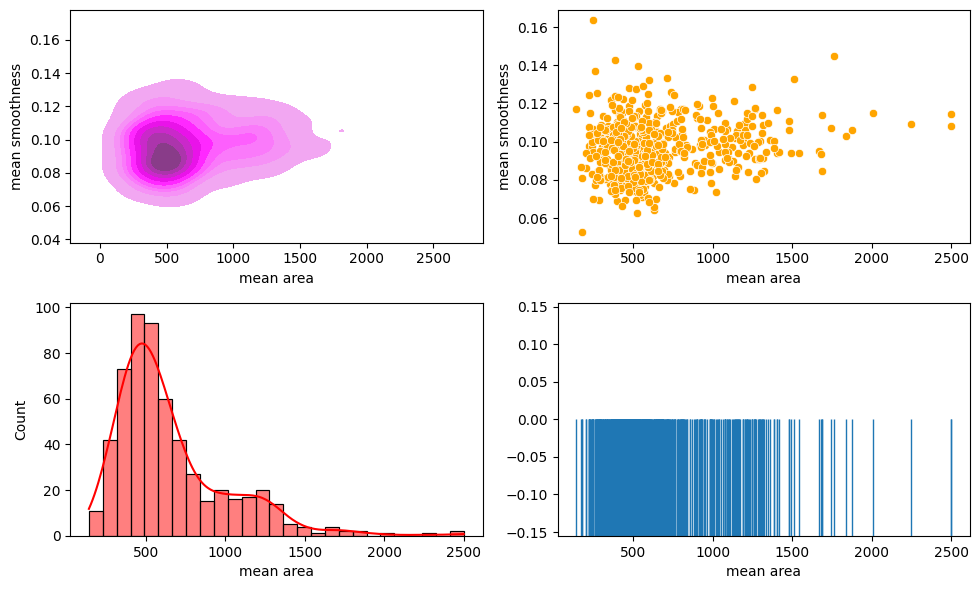

In [73]:
fig, ax = plt.subplots(2, 2, figsize = (10, 6))

sns.kdeplot(data=df, x = "mean area", y = "mean smoothness", color = "purple", fill = True, ax = ax[0][0])
sns.scatterplot(data=df, x = "mean area", y = "mean smoothness", color = "orange", ax = ax[0][1])
sns.histplot(data=df, x = "mean area", color = "red", ax = ax[1][0], kde=True)
sns.rugplot(data=df, x = "mean area", height = 0.5, ax = ax[1][1])

plt.tight_layout();

**Let's check the rest out.**

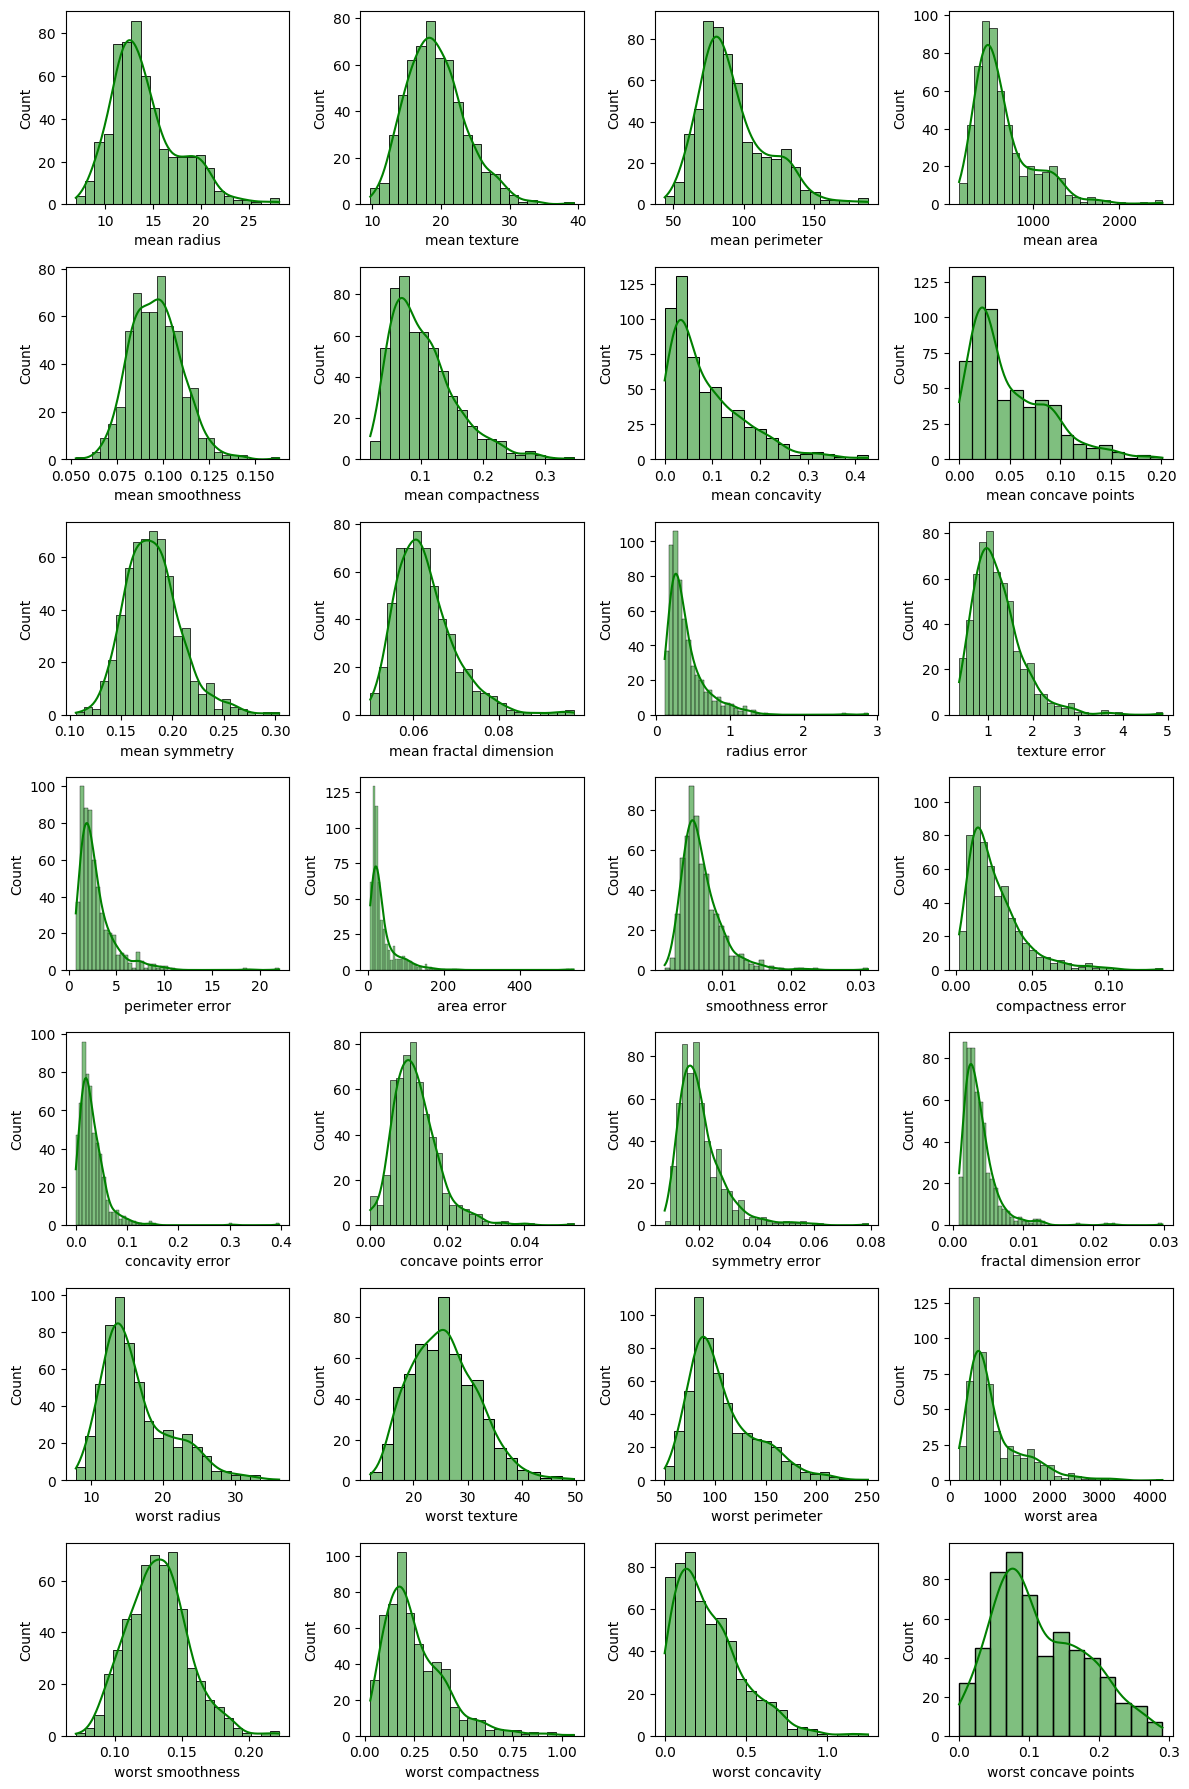

In [74]:
cols= list(df.columns)
fig, ax = plt.subplots(7,4,figsize=(12,18))

ind= 0
for i in range(7):
    for j in range(4):
        sns.histplot(df[cols[ind]], ax=ax[i,j], kde=True, color = "green")
        ind+=1
plt.tight_layout()
plt.show()


<span style="color:green;">**The above subplots show the distrubition of variables. The mean texture, mean smoothness, symmetry, the worst texture and the worst smoothness of cancer cells are normally disributed, it means, mean, median and mode of the variables are same.**
**However the disribution of the other features are not symmetric. They are right skewed,which means the mean of these variables are greater than the median.**</span>

**Plot the pairplot**


In [75]:

#sns.pairplot(df, palette = "viridis", diag_kind = "hist", corner=True);

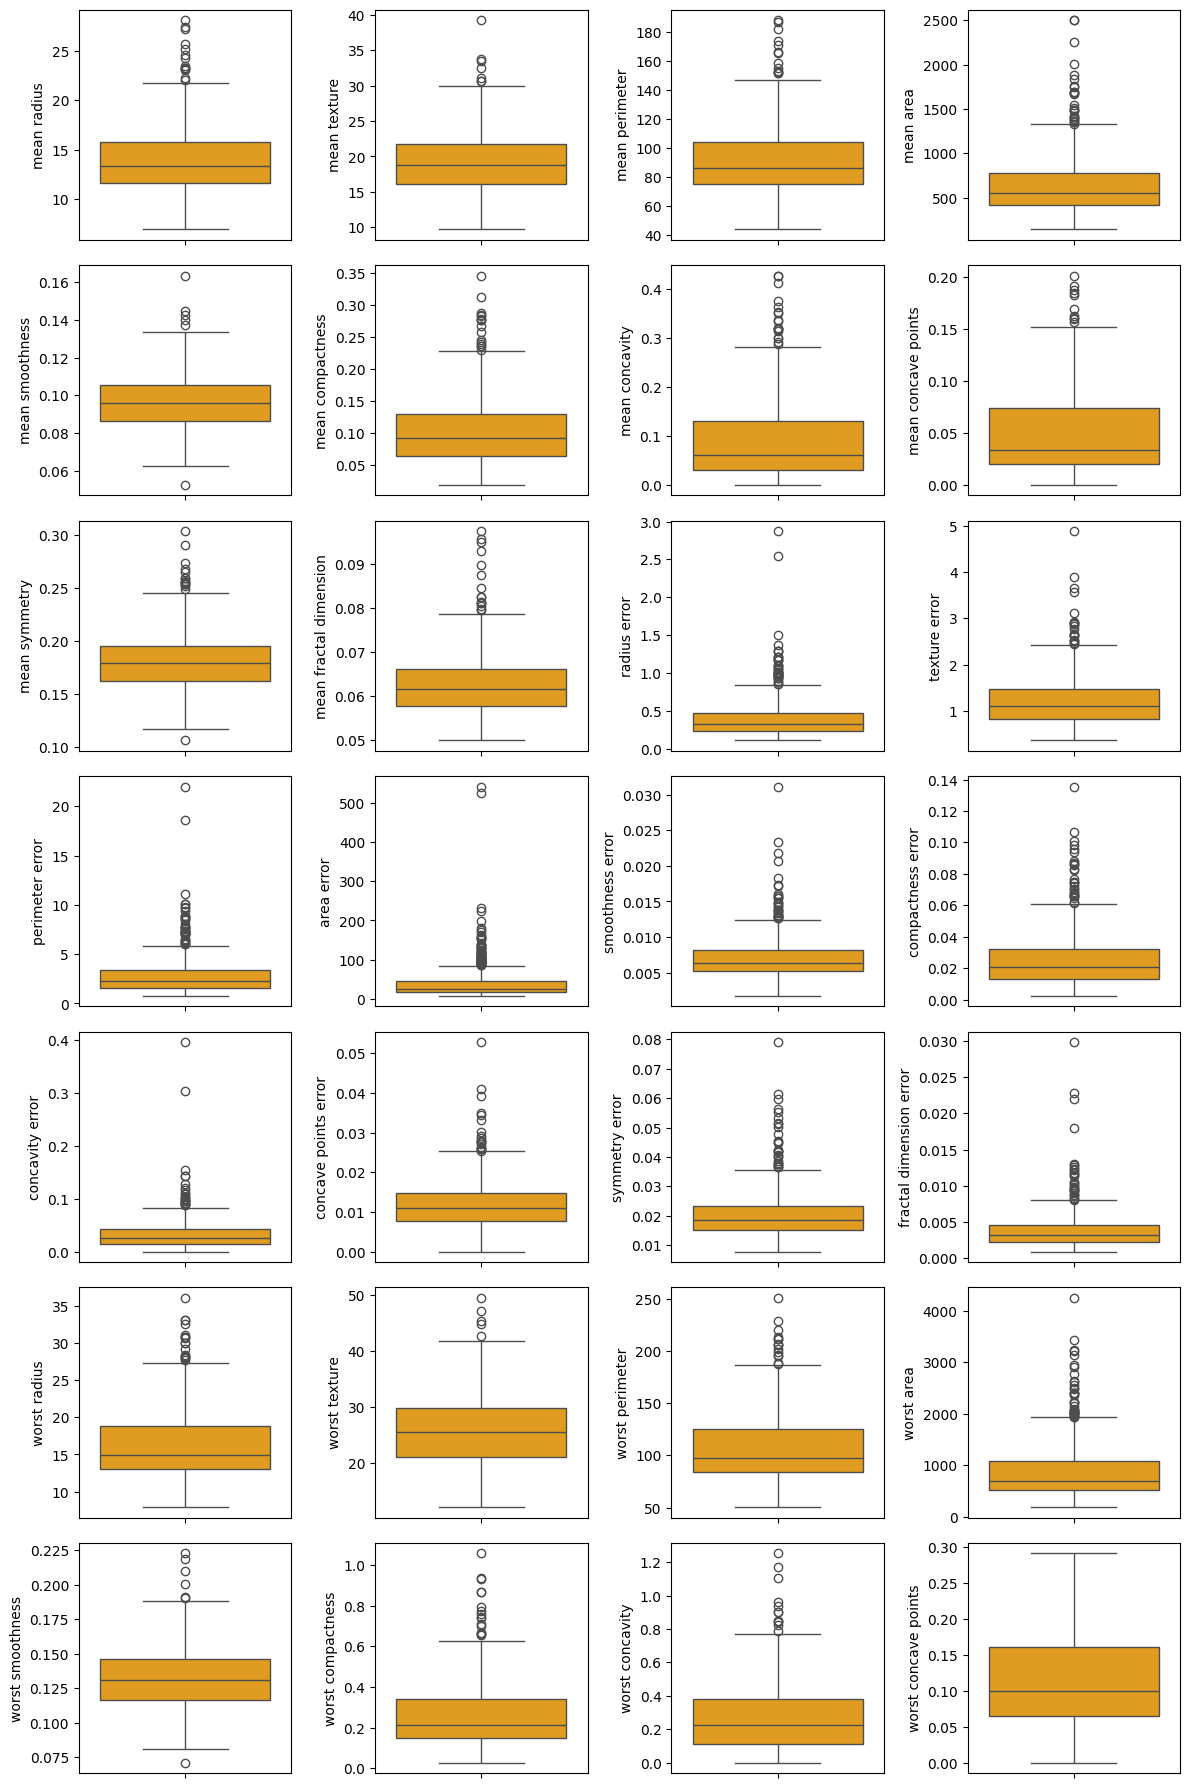

In [76]:
cols= list(df.columns)
fig, ax = plt.subplots(7,4,figsize=(12,18))

ind= 0
for i in range(7):
    for j in range(4):
        sns.boxplot(df[cols[ind]], ax=ax[i,j], color = "orange")
        ind+=1
plt.tight_layout()
plt.show()

### <span style="color:green;">It seems there are some outliers and needs to be removed or transformed from the data</span>

In [81]:
df.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'target'],
      dtype='object')

In [85]:
a = df.loc[:, ['mean radius', 'mean texture', 'mean perimeter', 'mean area','mean smoothness', 'mean compactness', 'mean concavity']]
b = np.log10(a)
b= pd.DataFrame(b)

C:\Users\Yaramis\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\pandas\core\internals\blocks.py:366: RuntimeWarning: divide by zero encountered in log10
  result = func(self.values, **kwargs)


In [86]:
cols= list(b.columns)
fig, ax = plt.subplots(4,1,figsize=(12,18))

ind= 0
for i in range(4):
    for j in range(1):
        sns.boxplot(b[cols[ind]], ax=ax[i,j], color = "orange")
        ind+=1
plt.tight_layout()
plt.show()

TypeError: 'list' object is not callable

**Strong correlation between the mean radius and mean perimeter, mean area and mean primeter**


In [13]:
a = df.loc[:, ['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity']]
corr = a.corr()


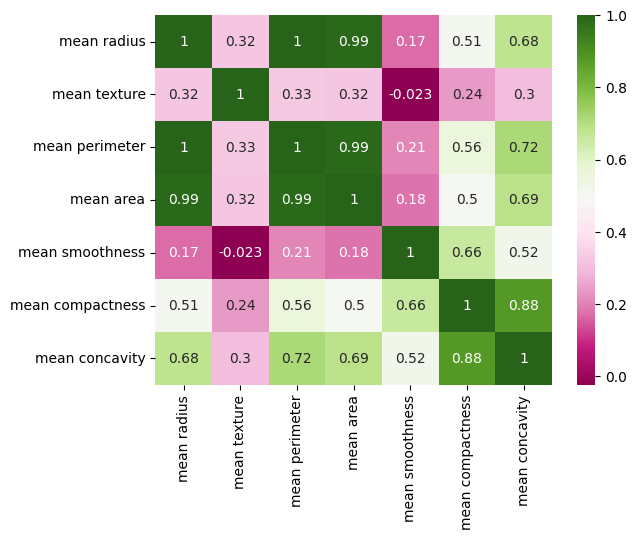

In [14]:
sns.heatmap(corr, annot = True, cmap="PiYG", );

**Plot two separate distplot for each target class #0 and target class #1**

In [15]:
target1= df[df.target==1]
target0= df[df.target==0]

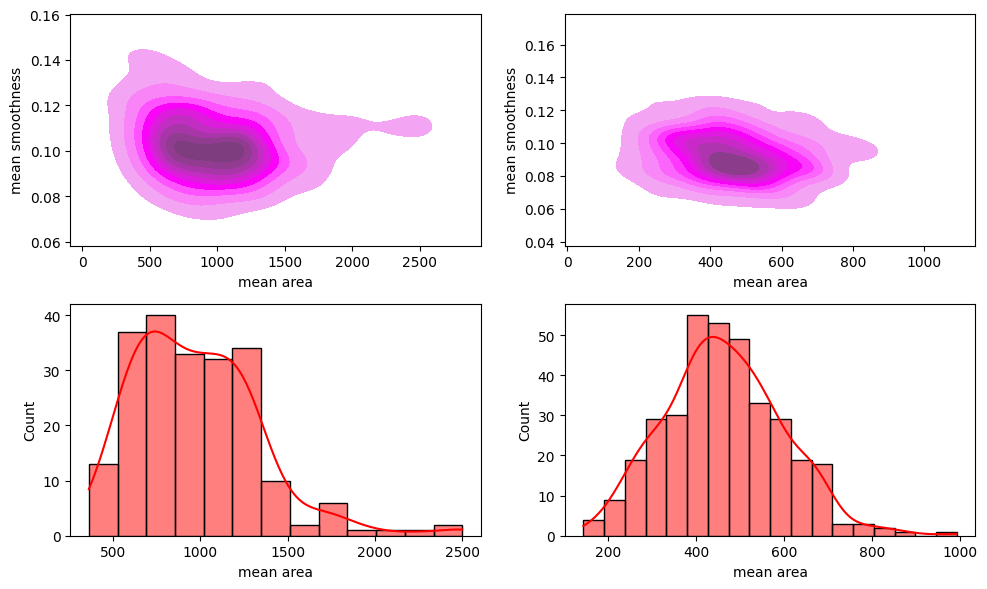

In [28]:
fig, ax = plt.subplots(2, 2, figsize = (10, 6))

sns.kdeplot(data=target0, x = "mean area", y = "mean smoothness", color = "purple", fill = True, ax = ax[0][0])
sns.kdeplot(data=target1, x = "mean area", y = "mean smoothness", color = "purple", fill = True, ax = ax[0][1])

sns.histplot(data=target0, x = "mean area", color = "red", ax = ax[1][0], kde=True)
sns.histplot(data=target1, x = "mean area", color='red', ax = ax[1][1],kde=True)

plt.tight_layout();

In [27]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


In [38]:
for col in df.columns:
    print(df.groupby('target')[col].sum().sort_values(ascending=False))

target
1    4336.309
0    3702.120
Name: mean radius, dtype: float64
target
1    6395.57
0    4580.24
Name: mean texture, dtype: float64
target
1    27872.92
0    24457.46
Name: mean perimeter, dtype: float64
target
0    207415.8
1    165216.1
Name: mean area, dtype: float64
target
1    33.01452
0    21.81448
Name: mean smoothness, dtype: float64
target
0    30.77981
1    28.59021
Name: mean compactness, dtype: float64
target
0    34.084240
1    16.442571
Name: mean concavity, dtype: float64
target
0    18.653880
1     9.181114
Name: mean concave points, dtype: float64
target
1    62.1844
0    40.8967
Name: mean symmetry, dtype: float64
target
1    22.44366
0    13.28818
Name: mean fractal dimension, dtype: float64
target
0    129.1255
1    101.4174
Name: radius error, dtype: float64
target
1    435.6757
0    256.7139
Name: texture error, dtype: float64
target
0    916.6730
1    714.1147
Name: perimeter error, dtype: float64
target
0    15406.550
1     7545.248
Name: area error, dtype: